# Notebook 2: Entraînement et Optimisation du Modèle

## Objectif
Ce notebook guide à travers l'entraînement du modèle Morningstar, incluant potentiellement une phase d'optimisation génétique des hyperparamètres et l'entraînement optionnel d'un agent RL. Il utilise le dataset préparé par le Notebook 01.

## 1. Configuration Globale du Notebook

Modifiez les variables dans la cellule suivante pour configurer le notebook.

In [24]:
# Cellule 1 — Initialisation des modules et du projet
import sys, os, json, glob, logging
import pandas as pd
import matplotlib.pyplot as plt

# Booléens pour activer/désactiver
RUN_GA_OPTIMIZATION = True
RUN_REASONING_MODEL_TRAINING = True
RUN_RL_TRAINING = True

# Clés API (optionnel)
API_KEYS = {
    "HF_TOKEN": os.getenv("HF_TOKEN", ""),
    "WANDB_API_KEY": os.getenv("WANDB_API_KEY", "")
}

# Logging & styling
logging.basicConfig(level=logging.INFO, format="%(asctime)s %(levelname)s %(message)s")
logger = logging.getLogger("morningstar_notebook")
plt.rcParams["figure.figsize"] = (10, 5)

# PYTHONPATH vers le code
PROJECT_ROOT = os.getcwd()
CODE_ROOT = os.path.join(PROJECT_ROOT, "ultimate")
if CODE_ROOT not in sys.path:
    sys.path.append(CODE_ROOT)
    logger.info(f"Ajout au PYTHONPATH: {CODE_ROOT}")

# Import des modules projet
from config.config import Config
cfg = Config()

from model.training.genetic_optimizer import optimize_hyperparams
from model.training.enhanced_reasoning_training import main as train_reasoning_model
try:
    from model.training.reinforcement_learning import train_rl_agent
except ImportError:
    train_rl_agent = None

# Répertoires
PROCESSED_DATA = os.path.join(CODE_ROOT, "data/processed/enriched_dataset.parquet")
OPT_DIR   = os.path.join(CODE_ROOT, "outputs/optimization")
ENH_DIR   = os.path.join(CODE_ROOT, "outputs/enhanced")
RL_DIR    = os.path.join(CODE_ROOT, "outputs/rl_agent")
for d in (OPT_DIR, ENH_DIR, RL_DIR):
    os.makedirs(d, exist_ok=True)

logger.info(f"Dataset traité : {PROCESSED_DATA}")


2025-05-12 03:14:35,320 - morningstar_notebook - INFO - Dataset traité : /home/morningstar/Desktop/crypto_robot/Morningstar/ultimate/data/processed/enriched_dataset.parquet


## 2. Optimisation Génétique des Hyperparamètres (Optionnel)

Exécute `ultimate/model/training/genetic_optimizer.py` si `RUN_GA_OPTIMIZATION` est `True`.

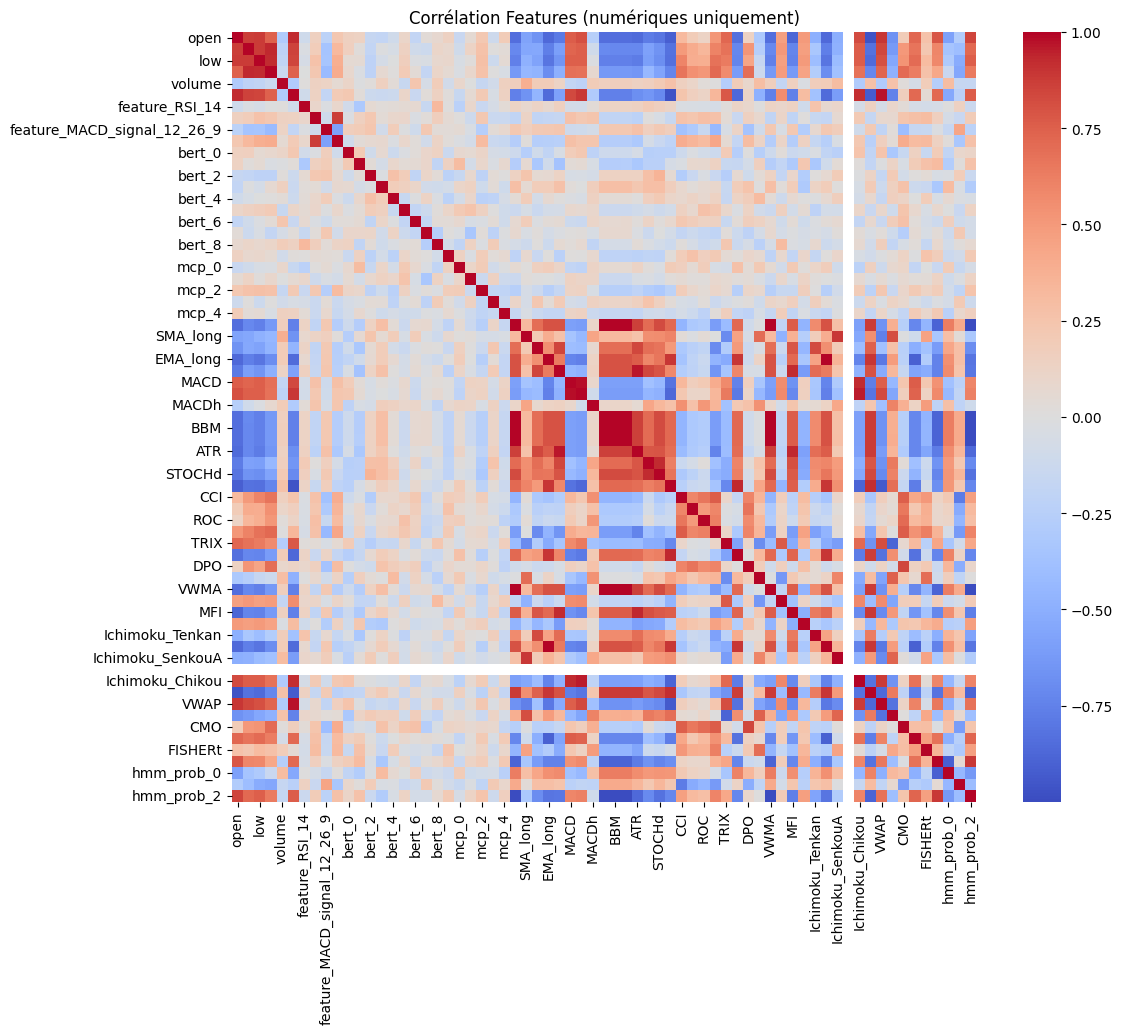

In [25]:
# Optionnel — Matrice de corrélation (colonnes numériques uniquement)
import seaborn as sns  # veille à l’avoir installé : pip install seaborn

# Sélection des colonnes numériques
num_df = df.select_dtypes(include="number")

# Calcul de la matrice de corrélation
corr = num_df.corr()

# Tracé
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Corrélation Features (numériques uniquement)")
plt.show()


In [26]:
# Cellule 2 — Aperçu rapide du dataset
if os.path.exists(PROCESSED_DATA):
    df = pd.read_parquet(PROCESSED_DATA)
    display(df.head(3))
    print(f"Shape: {df.shape}")
    df.describe().T
else:
    logger.error("Dataset introuvable, vérifie PROCESSED_DATA")


,timestamp,open,high,low,close,volume,symbol,feature_SMA_10,feature_RSI_14,feature_MACD_12_26_9,...,VWAP,STOCHRSIk,CMO,PPO,FISHERt,hmm_regime,hmm_prob_0,hmm_prob_1,hmm_prob_2,market_regime
0,2023-01-01 00:00:00+00:00,100.049671,100.198744,99.977773,100.197732,1429,BTC/USDT,100.131599,46.784002,0.250615,...,100.124750,0.0,0.0,0.0,0.0,2,0.0,0.0,1.0,0
1,2023-01-01 00:01:00+00:00,100.035845,100.198534,99.977127,100.166373,1556,BTC/USDT,100.131599,39.909240,0.306835,...,100.119152,0.0,0.0,0.0,0.0,2,0.0,0.0,1.0,0
2,2023-01-01 00:02:00+00:00,100.100614,100.212917,99.938742,100.103171,1571,BTC/USDT,100.131599,44.238907,0.490505,...,100.107356,0.0,0.0,0.0,0.0,2,0.0,0.0,1.0,0


Shape: (60, 72)


## 3. Entraînement du Modèle de Raisonnement Amélioré

Appelle `ultimate/model/training/enhanced_reasoning_training.py` si `RUN_REASONING_MODEL_TRAINING` est `True`.

In [ ]:
# Cellule 3 — Optimisation génétique des hyperparams
best_ga_params = None

if RUN_GA_OPTIMIZATION and os.path.exists(PROCESSED_DATA):
    pop = cfg.get_config("ga_optimizer.population_size", 10)
    gen = cfg.get_config("ga_optimizer.generations", 5)
    logger.info(f"GA: population={pop}, generations={gen}")
    try:
        best_ga_params = optimize_hyperparams(
            data_path=PROCESSED_DATA,
            population_size=pop,
            generations=gen
        )
        logger.info("Optimisation GA terminée")
        print("Best GA params:", json.dumps(best_ga_params, indent=2))
    except Exception as e:
        logger.error("Erreur GA:", exc_info=True)
else:
    logger.info("Optimisation GA désactivée ou dataset manquant")


2025-05-12 03:14:39,297 - morningstar_notebook - INFO - GA: population=10, generations=5
/home/morningstar/miniconda3/envs/trading_env/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/morningstar/miniconda3/envs/trading_env/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/morningstar/miniconda3/envs/trading_env/lib/python3.11/site-packages/stable_baselines3/ppo/ppo.py:155: UserWarning: You have specified a mini-batch size of 205, but because the `RolloutBuffer` is of size `n_steps * n_envs = 614`, after every 2 untrunc

## 4. Entraînement de l'Agent RL (Optionnel)

Exécute l'entraînement par renforcement si `RUN_RL_TRAINING` est `True`.

In [ ]:
# Cellule 4 — Si le script GA génère une courbe, on peut la charger et tracer
ga_log = os.path.join(OPT_DIR, "ga_log.csv")
if os.path.exists(ga_log):
    ga_df = pd.read_csv(ga_log)
    plt.plot(ga_df["generation"], ga_df["best_fitness"], marker="o")
    plt.title("Fitness Optimale par Génération")
    plt.xlabel("Génération")
    plt.ylabel("Fitness")
    plt.grid(); plt.show()
else:
    logger.warning("Pas de ga_log.csv à tracer")


## 5. Visualisation des Courbes d’Apprentissage (TensorBoard)

Les logs d'entraînement du modèle de raisonnement (loss, accuracy, etc.) sont sauvegardés par TensorBoard dans `ultimate/outputs/enhanced/tb/`. Cette section montre comment les visualiser.

In [ ]:
# Cellule 5 — Entraînement du modèle de raisonnement
if RUN_REASONING_MODEL_TRAINING and os.path.exists(PROCESSED_DATA):
    # (option) injecter market_regime si manquant
    df = pd.read_parquet(PROCESSED_DATA)
    if "market_regime" not in df:
        df["market_regime"] = 0
        df.to_parquet(PROCESSED_DATA, index=True)
        logger.info("market_regime ajouté par défaut")

    args = [
        "--data-path", PROCESSED_DATA,
        "--output-dir", ENH_DIR
    ]
    logger.info("Lancement de l'entraînement Reasoning Model…")
    sys_argv_backup = sys.argv.copy()
    sys.argv = ["enhanced_reasoning_training.py"] + args
    try:
        train_reasoning_model()
        logger.info("Entraînement Reasoning terminé.")
    except SystemExit:
        logger.warning("Argparse SystemExit intercepté")
    except Exception as e:
        logger.error("Erreur entraînement Reasoning:", exc_info=True)
    finally:
        sys.argv = sys_argv_backup
else:
    logger.info("Entraînement Reasoning désactivé ou dataset manquant")


## 6. Liste des Artefacts d'Entraînement

Récapitulatif des fichiers importants produits par ce notebook.

In [ ]:
# Cellule 6 — Tracer les scalaires depuis TensorBoard (via tbparse)
tb_dir = os.path.join(ENH_DIR, "tb")
if os.path.isdir(tb_dir):
    try:
        from tbparse import SummaryReader
        events = glob.glob(os.path.join(tb_dir, "**/events.out.tfevents.*"), recursive=True)
        reader = SummaryReader(events[0], pivot=True)
        scalars = reader.scalars
        for metric in ["loss", "val_loss", "accuracy"]:
            cols = [c for c in scalars.columns if metric in c.lower()]
            if cols:
                plt.figure()
                for c in cols:
                    plt.plot(scalars["step"], scalars[c], label=c)
                plt.title(metric); plt.legend(); plt.show()
    except ImportError:
        logger.warning("Installer tbparse pour tracer TensorBoard ici (`pip install tbparse`).")
    except Exception:
        logger.error("Erreur lecture TensorBoard", exc_info=True)
else:
    logger.warning("Pas de logs TensorBoard trouvés")


Cellule 7 : Entraînement RL (optionnel)

In [ ]:
# Cellule 7 — Entraînement du RL Agent
if RUN_RL_TRAINING and train_rl_agent and os.path.exists(PROCESSED_DATA):
    logger.info("Lancement RL training…")
    try:
        metrics = train_rl_agent(
            data_path=PROCESSED_DATA,
            output_path=RL_DIR,
            n_episodes=cfg.get_config("rl.episodes", 500)
        )
        print("RL metrics:", metrics)
    except Exception as e:
        logger.error("Erreur RL training:", exc_info=True)
else:
    logger.info("RL désactivé ou indisponible")


Cellule 8 : Synthèse des artefacts

In [ ]:
# Cellule 8 — Vérification des artefacts produits
print("\n---- Artefacts générés ----")
print(f"GA params : {best_ga_params}")
print("Model Keras :", os.listdir(ENH_DIR))
print("feature_names.json :", os.path.exists(os.path.join(ENH_DIR, "feature_names.json")))
print("TB logs :", os.path.isdir(os.path.join(ENH_DIR, "tb")))
print("RL outputs :", os.listdir(RL_DIR) if os.path.isdir(RL_DIR) else "none")
